# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom
Lab Number: 1

# Business Understanding - 10 pts
<Describe Data Here>

# Data Understanding - 80 pts
<Use Subsections as defined below>

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [109]:
# Load data into dataframe
df = pd.read_csv('C:/Users/Allison/JupyterNotebook/Data/us-accidents/EDA_Dataset.csv')
df.columns = df.columns.str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('%','')

In [97]:
df.columns

Index(['ID', 'Severity', 'Start_Date', 'Start_Time', 'End_Date', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distancemi', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'AirportCode', 'TemperatureF',
       'Humidity', 'Pressurein', 'Visibilitymi', 'Wind_Speedmph',
       'Precipitationin', 'Weather_Condition', 'PointofInterest', 'Bump',
       'Crossing', 'Yield', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

## Statistics
Below is a table of standard statistics on our non-categorical data. We also show plots plots of some of these data.
* Higher severity accidents tend to have higher ranges for some weather data such as Temperature. This may be an issue of outliers.

In [119]:
#do a quick data description to show quick statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2261739.0,2.347158,0.482177,1.000000,2.000000,2.00000,3.000000,4.000000
Start_Lat,2261739.0,36.139166,4.829643,24.555269,33.286381,35.41317,40.002516,49.002201
Start_Lng,2261739.0,-94.074256,16.587856,-124.623833,-111.939392,-88.01226,-80.843864,-67.839745
Distancemi,2261739.0,0.182763,1.486276,0.000000,0.000000,0.00000,0.000000,333.630005
Zipcode,2261465.0,55399.331241,29869.825852,1001.000000,29485.000000,53713.00000,85051.000000,99371.000000
TemperatureF,2223462.0,62.686766,18.682833,-77.800000,51.000000,64.90000,77.000000,167.000000
Humidity,2221126.0,66.009578,22.289397,1.000000,50.000000,68.00000,85.000000,100.000000
Pressurein,2228673.0,29.861838,0.638054,0.000000,29.830000,29.98000,30.120000,33.040000
Visibilitymi,2215462.0,9.134368,2.791282,0.000000,10.000000,10.00000,10.000000,140.000000
Wind_Speedmph,2261739.0,7.035737,5.587857,0.000000,3.500000,6.90000,10.400000,822.800000


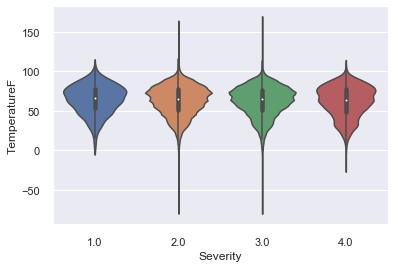

In [123]:
sns.violinplot(x="Severity",y="TemperatureF",data=df)

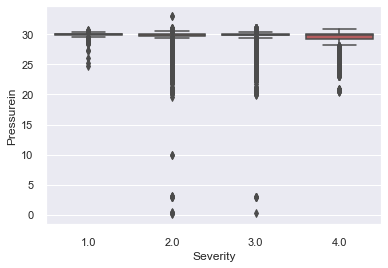

In [137]:
temp=df[df["Pressurein"]>0]
sns.boxplot(x="Severity",y="Pressurein",data=temp)

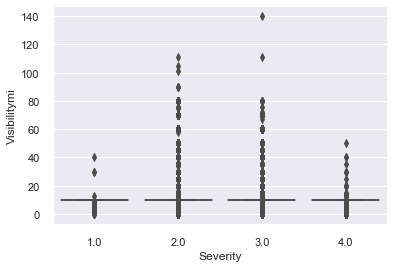

In [138]:
sns.boxplot(x="Severity",y="Visibilitymi",data=df)

Another interesting fact to explore is location of accidents. The states below have more highly severe accidents (3-4) than less severe (1-2).

In [ ]:
#state=df.groupby("State").mode().Severity
state=df.groupby('State')['Severity'].agg(lambda x: x.value_counts().index[0])

In [160]:
state1=state.to_frame()
state1[state1['Severity']>2]

,Severity
State,
CT,3.0
GA,3.0
IA,3.0
ID,3.0
KS,3.0
KY,3.0
MD,3.0
ME,3.0
MN,3.0


In [88]:
df1 = df.sample(n=1000)

In [89]:
pandas_profiling.ProfileReport(df1)

## Relationship Exploration - Severity

In our dataset, Severity is an ordinal variable that describes the severity of the accident. We may wish use machine learning methods to classify accidents into the four levels -- 1/light to 4/extreme severity -- to be able to provide civic institutions information on when, where, and during what weather do the most severe accidents occur.

As we would hope, level 4 accidents don't occur often, at a rate of 0.2% as shown in the table below. An interesting aspect of this data is that almost all of the accidents are concentrated in the 2's and 3's. Less than 1% of accidents are classified as a level 1.

In [87]:
sev0=df.groupby("Severity").count().ID
sev0=sev0.to_frame()
sev1=df.groupby("Severity").count().ID / df.count().ID
sev1=sev1.to_frame()

sev2=sev0.merge(sev1, on="Severity").rename(columns={"ID_x": "Count", "ID_y": "Pct"})
sev2.style.format({
    'Severity': '{:.0}',
    'Count': '{:,d}',
    'Pct': '{:,.1%}'.format,
})

,Count,Pct
Severity,,
1.0,968,0.0%
2.0,"1,480,276",65.4%
3.0,"774,841",34.3%
4.0,"5,654",0.2%


We looked at how various weather elements were associated with severity, as shown in the table below. Our preliminary findings were:
* As visibility decreases, the severity of the accident increases
* As temperature decreases, the severity of the accident increases
    - As a next step, we would like to layer on month or season to see if this is always the case or if accidents are worse in cold seasons
* More severe accidents affect larger stretches of road
* As the wind speed increases, the severity of the accident increases
* The effects of precipitation, pressure, and humidity on accident severity are inconclusive

In [94]:
vis=df.groupby("Severity").mean().Visibilitymi
vis=vis.to_frame()
# Visiblity is lower when the severity is higher

temp=df.groupby("Severity").mean().TemperatureF
temp=temp.to_frame()
# Temperature is lower when the severity is higher

dist=df.groupby("Severity").mean().Distancemi
dist=dist.to_frame()
# More severe accidents affect larger areas

precip=df[df["Precipitationin"]>0]
precip=precip.groupby("Severity").mean().Precipitationin
precip=precip.to_frame()
# When there is precipitation, the amount does not appear to be correlated with severity

wind=df.groupby("Severity").mean().Wind_Speedmph
wind=wind.to_frame()
# Higher severity may be linked to higher wind speeds

pres=df.groupby("Severity").mean().Pressurein
pres=pres.to_frame()
# Effect of pressure less clear

hum=df.groupby("Severity").mean().Humidity
hum=hum.to_frame()
# Effect of humidity less clear

by_severity = pd.concat([vis, temp, dist, wind, precip, pres, hum], axis=1)
by_severity.style.format({
    'Visibilitymi': '{:,.2f}',
    'TemperatureF': '{:,.2f}',
    'Distancemi': '{:,.2f}',
    'Wind_Speedmph': '{:,.2f}',
    'Precipitationin': '{:,.2f}',
    'Pressurein': '{:,.2f}',    
    'Humidity': '{:,.2f}',
})

,Visibilitymi,TemperatureF,Distancemi,Precipitationin,Wind_Speedmph,Pressurein,Humidity
Severity,,,,,,,
1.0,9.29,64.62,0.02,0.07,6.95,29.93,65.52
2.0,9.16,62.93,0.07,0.09,6.98,29.85,66.04
3.0,9.08,62.22,0.36,0.11,7.14,29.88,65.94
4.0,9.01,61.83,3.91,0.08,7.14,29.47,68.76


From the information above, we can see that certain aspects of the weather may be important to how severe a traffic accident is. Below, we show the count and frequency of accidents by severity and season. We see that the more severe accidents occur in the fall, while the least severe accidents occur in the summer. Because in this dataset "severe" means "impact to traffic", the least severe accidents occuring in the summer may be due to reduced traffic in the summer.

In [98]:
def getSeason(date):
    month=pd.to_datetime(date).month
    if month <= 3:
        return 'Winter'
    elif month <= 6:
        return 'Spring'
    elif month <= 9:
        return 'Summer'
    else:
        return 'Fall'

In [100]:
season =df['Start_Date'].apply(getSeason)

In [101]:
df['Season']=season

In [102]:
freq_table = pd.crosstab(index=df["Severity"], columns=df["Season"], margins=True)
freq_table.columns.values[4]='All Seasons'
freq_table.index.values[4]='All Sev'
freq_table.style.format({
    'Fall': '{:,.0f}',
    'Spring': '{:,.0f}',
    'Summer': '{:,.0f}',
    'Winter': '{:,.0f}',
    'All Seasons': '{:,.0f}'
})

Season,Fall,Spring,Summer,Winter,All Seasons
Severity,,,,,
1.0,269,219,281,199,968
2.0,"454,007","321,705","400,064","304,500","1,480,276"
3.0,"221,932","173,576","211,872","167,461","774,841"
4.0,"1,914","1,488","1,432",820,"5,654"
All Sev,"678,122","496,988","613,649","472,980","2,261,739"


In [103]:
freq_table.div(freq_table["All Seasons"],axis=0).style.format({
    'Fall': '{:,.1%}',
    'Spring': '{:,.1%}',
    'Summer': '{:,.1%}',
    'Winter': '{:,.1%}',
    'All Seasons': '{:,.0%}'
})

Season,Fall,Spring,Summer,Winter,All Seasons
Severity,,,,,
1.0,27.8%,22.6%,29.0%,20.6%,100%
2.0,30.7%,21.7%,27.0%,20.6%,100%
3.0,28.6%,22.4%,27.3%,21.6%,100%
4.0,33.9%,26.3%,25.3%,14.5%,100%
All Sev,30.0%,22.0%,27.1%,20.9%,100%


Overall, most accidents occur in the Fall months, as shown graphically in the histogram below.

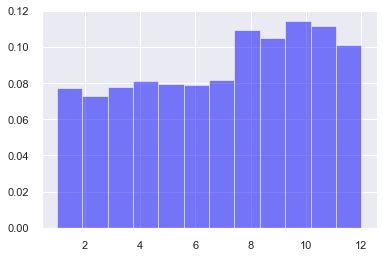

In [118]:
df['Month'] = pd.DatetimeIndex(df['Start_Date']).month
num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(df['Month'], num_bins, density=1, facecolor='blue', alpha=0.5)

## Data Meaning - 10 pts

## Data Quality - 15 pts

## Sample Statistics - 10 pts

## Visualizations - 15 pts

## Attribute Relationships - 15 pts

## Relationship Exploration - 10 pts

## Other Features - 5 pts

## Exceptional Work - 10 pts